## Cross-Validation

`Cross-validation` is a robust method to evaluate a machine learning model’s performance by splitting the data into multiple subsets (folds) and training/testing the model on different combinations of these subsets. It helps to assess how the model generalizes to unseen data and reduces variance from random train-test splits.

Example: K-Fold Cross-Validation
  - Split data into k (e.g., 5) roughly equal parts.

  - For each fold: use one part as validation, remaining k-1 parts to train.

  - Repeat for all folds and average performance metrics.

In [ ]:
# Cross-Validation with scikit-learn to evaluate a regression model
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Sample data
X = np.random.rand(100, 10)
y = np.random.rand(100)

# Define model
model = RandomForestRegressor()
# Perform Cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
#Output the average scores
print(f"Mean MAE: {np.mean(-scores)}")

Mean MAE: 0.29158900857730075


### Hyperparameter Tuning

Machine learning models have hyperparameters—external settings that govern training (e.g., tree depth, learning rate). Hyperparameter tuning aims to find the optimal set of hyperparameters that maximize the model’s predictive performance.

Methods:
  - Manual Search: Try different values based on intuition.

  - Grid Search: Exhaustive search over specified parameter values.

  - Random Search: Randomly sample hyperparameter combinations.

  - Bayesian Optimization: Probabilistic model-based search.

### GridSearchCV

`GridSearchCV` automates hyperparameter tuning with cross-validation. It performs exhaustive search over specified hyperparameter combinations and selects the best based on cross-validated scoring.


In [ ]:
# Example: Tuning Random Forest Parameters
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100, 200],
    'max_depth' : [None, 10, 20]
}

# Sample data
X_train = np.random.rand(100, 10)
y_train = np.random.rand(100)

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {-grid_search.best_score_}")

Best Parameters: {'max_depth': None, 'n_estimators': 100}
Best Score: 0.23748978446378577


### SHAP Values (SHapley Additive exPlanations)

`SHAP` values provide a unified approach to interpret machine learning model predictions by assigning each feature a contribution value (positive or negative) for a specific prediction. SHAP leverages cooperative game theory (Shapley values) to quantify feature importance consistently.

Benefits:
  - Model-agnostic interpretation (works for tree-based, neural nets, others).

  - Local explanations (for individual predictions).

  - Global explanations (feature importance across dataset).

In [ ]:
!pip install shap

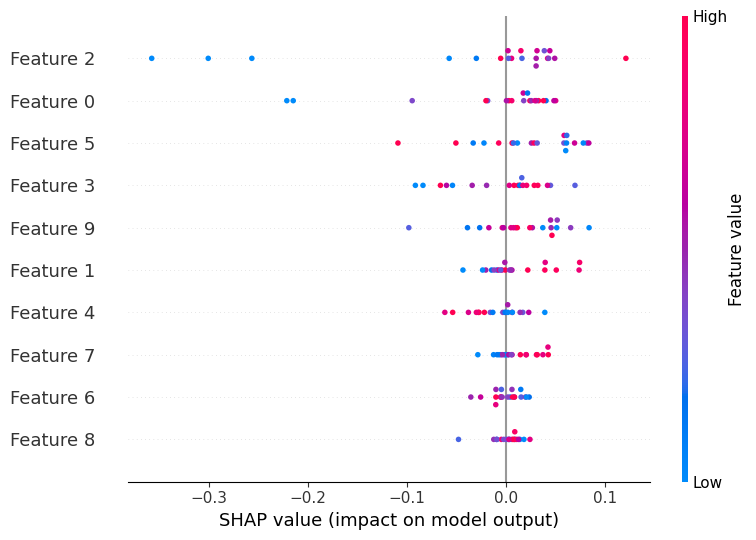

In [ ]:
import shap
import xgboost as xgb

# Sample Data
X_train = np.random.rand(100, 10)
y_train = np.random.rand(100)
X_val = np.random.rand(20, 10)

# Train XGBoost model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Create SHAP explainer
explainer = shap.Explainer(model)

# Caculate SHAP values for validation set
shap_values = explainer(X_val)

# Plot the summary plot
shap.summary_plot(shap_values, X_val)


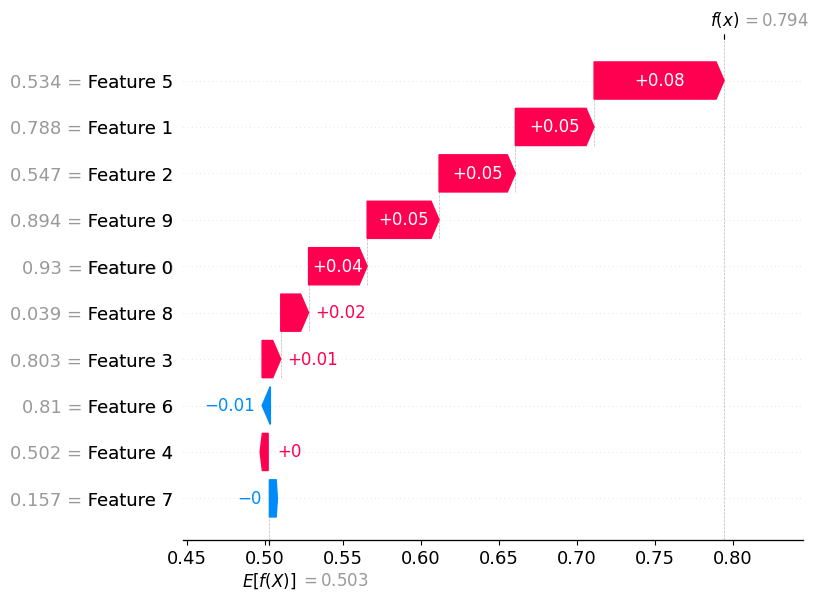

In [ ]:
#Plot for single prediction explanation
shap.plots.waterfall(shap_values[0])

### Summary
This notebook succinctly covers fundamental practices in model evaluation (cross-validation), parameter optimization (GridSearchCV), and model interpretability (SHAP), supported with practical Python code examples using scikit-learn and XGBoost. These serve as essential techniques for building, tuning, and explaining predictive models effectively.